In [48]:
from loader import *
from datasets import *
from vis_utils import *
from utils import *
from stats import *
from model_utils import *
from plt_utils import *
from logs import logger
import logs, datasets, vis_utils, loader


logger.setLevel(logs.WARN)
%load_ext autoreload
# %reload_ext autoreload
%autoreload 2
matplotlib.style.use('ggplot')
%matplotlib inline

utils.init_dev(utils.get_dev( ))
utils.allow_growth()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Auto select gpu
 ID  GPU  MEM
--------------
  0   0%   2%
  1   0%   1%
  2   0%  70%
  3   0%   0%
  4 100%  22%
  5   0%   5%
  6   0%   5%
  7   0%   5%


# Understanding the Structure of Classification Loss Function
Let us start with 2-dim case, Assume we have an linear classifier with orthogonal kernel:

$$\left[\begin{array}{cc}   \sqrt{3}/2 & -1/2 \\ 1/2 & \sqrt{3}/2 \end{array}\right]$$

and have a simple feature (x,y) and corresponding label 0. We just want to know where is *most* likely for label 0  to exist.

> Notes: for visualization pursose we plot $-loss$, that is, more light means more possible to be label 0.

In [41]:
from __future__ import division
X,Y=gen_disk(smpls=(10,50))
X=X.flatten()
Y=Y.flatten()
# scatter(X,Y,np.ones_like(X))
ker=np.array([[np.sqrt(3)/2,-1/2],[1/2,np.sqrt(3)/2]])

After preparing data, we start to test different loss function (for **calassification** problems)
## cross entroy loss 
Cross entroy loss and hinge loss will consider other class's logit, thus tend to achieve max margin rather than close to where one-hot code indicates(the place `kernel1` occupies). However, mse loss just want to be close to `kernel1`

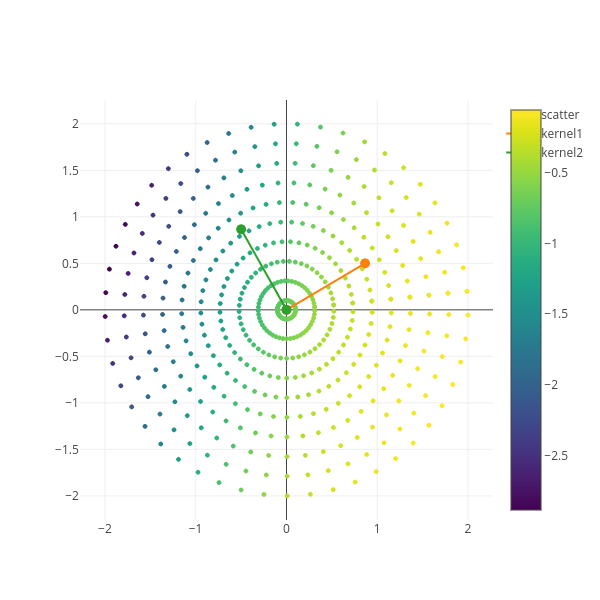

In [42]:
from plt_utils import *
C=[]
for feature in zip(X,Y):
    logit=np.dot(feature,ker)
    pred=softmax([logit])
    C.append(-1* -np.log(pred[0,0]) )
data=(scatter(X,Y,C) 
      + line([0,ker[0,0]],[0,ker[1,0]],name='kernel1') 
      +line([0,ker[0,1]],[0,ker[1,1]],name='kernel2' )
     )
plot(data)

## mse loss

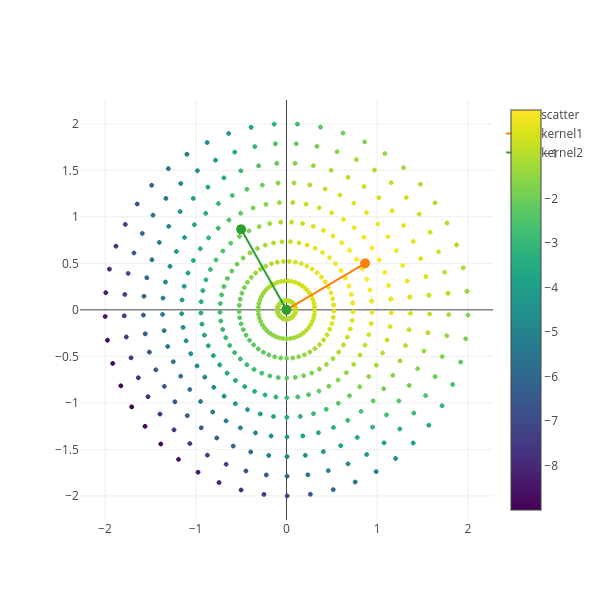

In [43]:
C=[]
for data_ in zip(X,Y):
    logit=np.dot(data_,ker)
    C.append(-mse_loss(logit,[1,0]))
data=scatter(X,Y,C)+line([0,ker[0,0]],[0,ker[1,0]],name='kernel1')+line([0,ker[0,1]],[0,ker[1,1]],name='kernel2' )    
plot(data)

## hinge loss
I choose $\Delta=0.5$.

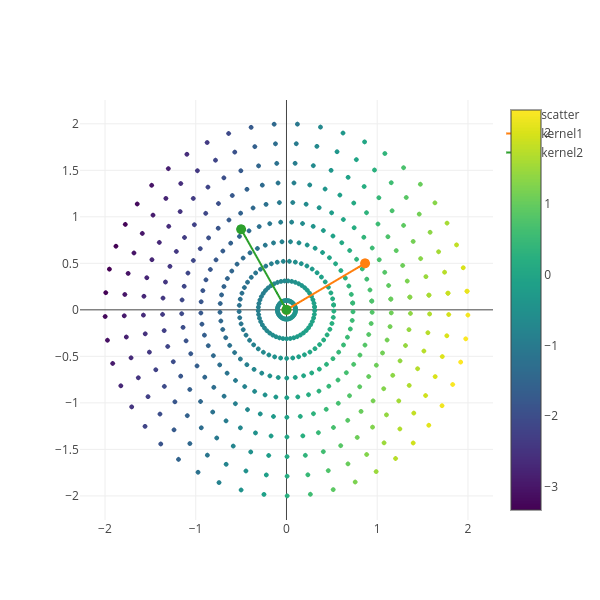

In [44]:
C=[]
for data_ in zip(X,Y):
    logit=np.dot(data_,ker)
    C.append(-(logit[1]- logit[0]+0.5) )
data=scatter(X,Y,C)+line([0,ker[0,0]],[0,ker[1,0]],name='kernel1')+line([0,ker[0,1]],[0,ker[1,1]],name='kernel2' )    
plot(data)


## huber loss
Huber loss view hard example(The label is correct) as an outlier. Ignore them so that do not degenerate other sample's classification results.

## focal loss
Focal loss also modifies loss function 

> what is the relation between loss function and final accuracy for classification problem?